Aufgabe  1c) (i):


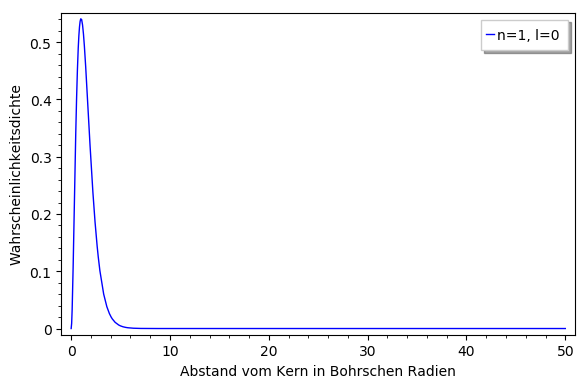

Aufgabe 1c) (ii): 

(0.5413411329464507, 1.00000000100484)
wobei: y = W-keit = 0.5413411329464507 und x = Abstand von Kern in Bohrschen Radien = 1.00000000100484
Abweichung für x bzw r_Bohr(also warum x nicht = 1) könnte an Genauigkeit der Numerischen Berechnung liegen

Aufgabe 1c) (iii):

Der Erwartungswert für den QM Abstand entspricht dem Bohrschen Radius (unter der Annahme, dass die Abweichung bei 1c)(ii) von der Numerischen Rechung kommt, liegt sonst aber seher nahe dran).
Unterschied ist, dass man im Bohrschen Atommodell einen festen Radius hat, in der QM aber auch abweichungen vorliegen können und man nur einen Erwartungswert angeben kann.

Aufgabe 1c) (iv):



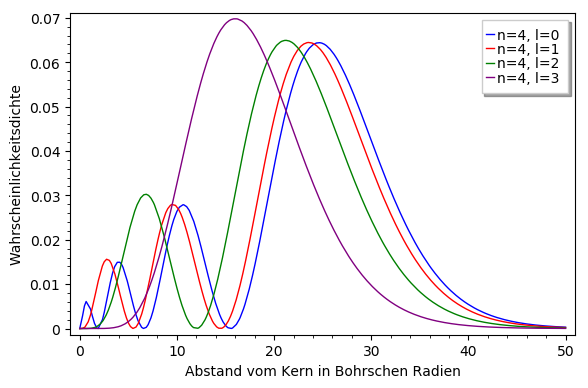

Aufgabe 1c) (v):



Das Maximum der Wahrscheinlichkeitsdichte und somit auch der Erwartungswert von Bor sind weiter von vom Kern entfernt, wie man im Graphen erkennt. Damit kann man sagen, dass Bor den Größten Atomradius hat. 
 Da in dieser Näherung Wasserstoff und Helium den gleichen Graphen haben, kann man sagen, dass ohne Wechselwirkung der Elektron Wasserstoff und Helium den gleichen Atomradius haben. Würde man die Elektronen Wechselwirkung mitbeachten, hätte Wasserstoff vermutlich den geringsten Radius.


In [382]:
from scipy.constants import hbar, epsilon_0, elementary_charge, electron_mass

r = var('r') #Normales r als Radius
r_Bohr = var('r_Bohr') #stellt r/a_0 also r durch Bohrschen Radius dar

#Quantenzahlen für Grundzustand##############################################################################################
l = 0
n = 1
#m = 0
#############################################################################################################################

#Konstanten für H-Atom######################################################################################################
Z = 1
a_Bohr = 4*pi*epsilon_0*hbar**2/(electron_mass*elementary_charge**2) #erster Bohrscher Radius
############################################################################################################################

#a_k funktion für Potenzreihenansatz Kugelfunktion##########################################################################
def a_K(k_end, k, l, a_0 = a_K0):
    k_end = k_end
    k = k
    l = l
    a_0 = a_0 
    if k == k_end:
        return a_0
    val = a_0*(k*(k+1) - l*(l+1))/((k+2)*(k+1));
    if k + 2 == k_end:
        return val
    elif k + 2 != k_end:
        return a_K(k_end, k + 2, l, val)
    elif k > k_end:
        print("Ohhh NNNEEEEEINNNN Kugel!!!!!")
        return 0
a_K0 = 1/sqrt(2) #normiertes a_0 für Kugelfunktion
a_K1 = 100 #nomiertes a_1 für Kugelfkt
#############################################################################################################################

#a_k funktion für Potenzreihenansatz RadialFunktion##########################################################################
def a_R(k_end, k, l, n, a_0):
    k_end = k_end
    k = k
    l = l
    n = n
    a_0 = a_0 
    if k == k_end:
        return a_0
    val = a_0*2*(k + l + 1 - n)/((k + l +2)*(k + l +1) - l*(l + 1));
    if k + 1 == k_end:
        return val
    elif k + 1 != k_end:
        return a_R(k_end, k + 1, l, n, val)
    elif k > k_end:
        print("Ohhh NNNEEEEEINNNN Radial!!!!!")
        return 0

#############################################################################################################################


#Python Methode zum normalisieren von a_0^(n) der Radialfkt.################################################################
def normalize_a_R0(n, l):
    a_04 = var('a_04')
    n = n
    l = l
    R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, a_0 = a_04)*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
    w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
    #Integral für W-keit über gesamten Raum soll = 1:
    from sage.symbolic.integration.integral import definite_integral
    I = definite_integral(w(r_Bohr), r_Bohr, 0 ,infinity)
    norm = solve(I == 1, a_04)[1].rhs()
    return norm
##############################################################################################################################

#Radialfkt###################################################################################################################
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n,l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
#############################################################################################################################

#Radiale Wahrscheinlichkeitsdichte###########################################################################################
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2#*2*(sum(((a_K(i, 0, l, a_K0))**2)/(2*i+1) for i in [0, 2, 4, 6, 8..l])) #+ sum(((a_K(i, 1, l, a_K1))**2)/(2*i+1) for i in [1, 3, 5, 7, 9..l-1]))
#############################################################################################################################

#Aufgabe 1 c) (i) Plot für Grundzustand: n==1, l==0##########################################################################
l = 0
n = 1
#m = 0

R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n,l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))

w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2

print('Aufgabe  1c) (i):')
show(plot(w(r_Bohr), (r_Bohr, 0, 50),frame=True, legend_label = 'n=1, l=0', axes_labels=['Abstand vom Kern in Bohrschen Radien', 'Wahrscheinlichkeitsdichte']), axes_labels_size=1, axes=False)
##############################################################################################################################

#Aufgabe 1 c) (ii) Maximum in Bohrschen Radien################################################################################
r_MaxGrund = find_local_maximum(w(r_Bohr), 0, 50) #Numerisch(!!!) bestimmtes Maxium der W-keit fkt w(r), diese ist schon mit x-achse in bohrschen radien
print('Aufgabe 1c) (ii): \n')
print(r_MaxGrund )
print('wobei: y = W-keit = ' + str(r_MaxGrund[0]) + ' und x = Abstand von Kern in Bohrschen Radien = ' + str(r_MaxGrund[1]))
print('Abweichung für x bzw r_Bohr(also warum x nicht = 1) könnte an Genauigkeit der Numerischen Berechnung liegen\n')
##############################################################################################################################

#Aufgabe 1 c) (iii)###########################################################################################################
print('Aufgabe 1c) (iii):\n')
print('Der Erwartungswert für den QM Abstand entspricht dem Bohrschen Radius (unter der Annahme, dass die Abweichung bei 1c)(ii) von der Numerischen Rechung kommt, liegt sonst aber seher nahe dran).')
print('Unterschied ist, dass man im Bohrschen Atommodell einen festen Radius hat, in der QM aber auch abweichungen vorliegen können und man nur einen Erwartungswert angeben kann.\n')
##############################################################################################################################

#Aufgabe 1 c) (iv)############################################################################################################

#Zu Plottende Fkts:
#0. n=4, l=0:
l = 0
n = 4
#m = 0
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
W_R40 = plot(w(r_Bohr), (r_Bohr, 0 , 50), legend_label = 'n=4, l=0', frame=True, axes_labels=['Abstand vom Kern in Bohrschen Radien', 'Wahrscheinlichkeitsdichte'], axes_labels_size=1, axes=False)
#1. n=4, l=1:
l = 1
n = 4
#m = 0
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
W_R41 = plot(w(r_Bohr), (r_Bohr, 0 , 50), color = 'red', legend_label = 'n=4, l=1')
#2. n=4, l=2:
l = 2
n = 4
#m = 0
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
W_R42 = plot(w(r_Bohr), (r_Bohr, 0 , 50), color = 'green', legend_label = 'n=4, l=2')
#3. n=4, l=3:
l = 3
n = 4
#m = 0
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
W_R43 = plot(w(r_Bohr), (r_Bohr, 0 , 50), color = 'purple', legend_label = 'n=4, l=3')

#Plot mit allen Fkts:
print('Aufgabe 1c) (iv):\n')

show(W_R40 + W_R41 + W_R42 + W_R43)
##############################################################################################################################

#Aufgabe 1 c) (v)#############################################################################################################

#Vergleiche Grundzustand von Wasserstoff: n=1 , l=0 mit Zustand n=2, l=1, welcher Bor charakterisiert:

#Grundzustand Wasserstoff: n=1, l=0:
l = 0
n = 1
#m = 0
Z = 1#Hier noch Z =1 für H, Z=2 für He, wegen ordnungzahl????
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
H = plot(w(r_Bohr), (r_Bohr, 0, 5),legend_label = 'Grundzustand H/He', frame=True, axes_labels=['Abstand vom Kern in Bohrschen Radien', 'Wahrscheinlichkeitsdichte'], axes_labels_size=1, axes=False)

##Grundzustand Helium: n=1, l=0:
#l = 0
#n = 1
##m = 0
#Z = 2#Hier noch Z =1 für H, Z=2 für He, wegen ordnungzahl????
#R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
#w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
#He = plot(w(r_Bohr), (r_Bohr, 0, 5),color = 'red',legend_label = 'He', frame=True, axes_labels=['Abstand vom Kern in Bohrschen Radien', 'Wahrscheinlichkeitsdichte'], axes_labels_size=1, axes=False)

#Bor: n=2, l=1:
l = 1
n = 2
Z = 1#m = 0
#Hier noch Z = 5 für B, wegen ordnungszahl
R(r_Bohr) = ((exp(-Z*r_Bohr/n))/(r_Bohr*a_Bohr))*(sum(a_R(k, 0 ,l, n, normalize_a_R0(n, l))*((Z*r_Bohr/n))**(k+l+1) for k in [0..(n - l -1)]))
w(r_Bohr) = (r_Bohr*a_Bohr*R(r_Bohr))**2
B = plot(w(r_Bohr), (r_Bohr, 0, 5),color = 'green', legend_label = 'B', frame=True, axes_labels=['Abstand vom Kern in Bohrschen Radien', 'Wahrscheinlichkeitsdichte'], axes_labels_size=1, axes=False)

#Zusammen aufgetragen:
print('Aufgabe 1c) (v):\n')
show(H+B)
print('Das Maximum der Wahrscheinlichkeitsdichte und somit auch der Erwartungswert von Bor sind weiter von vom Kern entfernt, wie man im Graphen erkennt. Damit kann man sagen, dass Bor den Größten Atomradius hat. \n Da in dieser Näherung Wasserstoff und Helium den gleichen Graphen haben, kann man sagen, dass ohne Wechselwirkung der Elektron Wasserstoff und Helium den gleichen Atomradius haben. Würde man die Elektronen Wechselwirkung mitbeachten, hätte Wasserstoff vermutlich den geringsten Radius.')
##############################################################################################################################